# ProsperLoanData
## by (Mohamed Al-ghaly)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in our dataset and describe its properties.


In [2]:
# load the data set
file_name = "prosperLoanData.csv"
loans = pd.read_csv(file_name)

**Lets get to know our dat set**

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loans.shape

(113937, 81)

Load the guide for our data frame to help us understand what is going on.

In [5]:
file_name = "Prosper Loan Data - Variable Definitions - Sheet1.csv"
guide = pd.read_csv(file_name)

In [6]:
guide.head()

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.


After getting to understand our data set I have decided to keep this column to work with and ignore the others:

In [7]:
to_keep = ["ListingNumber", "Term", "LoanStatus", "BorrowerRate",
           "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn", 
           "ProsperRating (Alpha)", "Occupation", "EmploymentStatus", 
           "IsBorrowerHomeowner", "LoanOriginalAmount", 
            "MonthlyLoanPayment", "Investors"]

In [8]:
loans = loans[to_keep]

Now lets construct our new data set with proper columns names

In [9]:
namer = {"ListingNumber": "id", "Term": "duration", "LoanStatus": "status", 
         "BorrowerRate": "rate", "EstimatedEffectiveYield": "yield", 
         "EstimatedLoss": "loss", "EstimatedReturn": "return", 
         "ProsperRating (Alpha)": "prosper", "Occupation": "occupation", 
         "EmploymentStatus": "employment", "IsBorrowerHomeowner": 'home_owner', 
         "LoanOriginalAmount": "loan_amount", "MonthlyLoanPayment": "payment", 
         "Investors": "investors"}

loans.rename(columns=namer, inplace=True)

Now lets reconstruct the guide dataframe for easier usage.

In [10]:
guide['Variable'] = guide.Variable.apply(lambda i: namer.get(i, np.nan))

In [11]:
guide.dropna(inplace=True)

In [12]:
guide.set_index("Variable", inplace=True)

**NOW WE HAVE OUR DATA SET WITH ONLY THE NEEDED COLUMNS AND OUR GUIDE DATA SET TO GUIDE US HOW TO USE OUR DATA SET NOW LETS CLEAN OUR DATA SET SOME MORE.**

Now lets have a look on the data set.

In [13]:
# descriptive statistics for numeric variables
loans.describe()

,id,duration,rate,yield,loss,return,loan_amount,payment,investors
count,1.139370e+05,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,113937.00000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.192764,0.168661,0.080306,0.096068,8337.01385,272.475783,80.475228
std,3.280762e+05,10.436212,0.074818,0.068467,0.046764,0.030403,6245.80058,192.697812,103.239020
min,4.000000e+00,12.000000,0.000000,-0.182700,0.004900,-0.182700,1000.00000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.134000,0.115670,0.042400,0.074080,4000.00000,131.620000,2.000000
50%,6.005540e+05,36.000000,0.184000,0.161500,0.072400,0.091700,6500.00000,217.740000,44.000000
75%,8.926340e+05,36.000000,0.250000,0.224300,0.112000,0.116600,12000.00000,371.580000,115.000000
max,1.255725e+06,60.000000,0.497500,0.319900,0.366000,0.283700,35000.00000,2251.510000,1189.000000


Lets see if the minus value in yield makes any sense

In [14]:
guide.loc['yield']['Description']

'Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.'

All makes perfect sense.

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           113937 non-null  int64  
 1   duration     113937 non-null  int64  
 2   status       113937 non-null  object 
 3   rate         113937 non-null  float64
 4   yield        84853 non-null   float64
 5   loss         84853 non-null   float64
 6   return       84853 non-null   float64
 7   prosper      84853 non-null   object 
 8   occupation   110349 non-null  object 
 9   employment   111682 non-null  object 
 10  home_owner   113937 non-null  bool   
 11  loan_amount  113937 non-null  int64  
 12  payment      113937 non-null  float64
 13  investors    113937 non-null  int64  
dtypes: bool(1), float64(5), int64(4), object(4)
memory usage: 11.4+ MB


all the data types are good but lets change the object data to category data type

In [16]:
categories = ['status', 'prosper', 'occupation', 'employment']
for i in categories:
    loans[i] = loans[i].astype('category')

In [17]:
loans.isna().sum()

id                 0
duration           0
status             0
rate               0
yield          29084
loss           29084
return         29084
prosper        29084
occupation      3588
employment      2255
home_owner         0
loan_amount        0
payment            0
investors          0
dtype: int64

yield, loss, return, prosper 
All This data are only available from july 2009 only so lets only investigate the data from this period which will be more  than enough.

In [18]:
loans.dropna(inplace=True)

occupation and employment have only small amount of nans it won't affect tha analysis.

**Now our data set is clean and tidy and well dressed for our investigation. LETS START OUR FUN**

In [19]:
loans.shape

(83520, 14)

In [20]:
loans.head(10)

,id,duration,status,rate,yield,loss,return,prosper,occupation,employment,home_owner,loan_amount,payment,investors
1,1209647,36,Current,0.0920,0.07960,0.0249,0.05470,A,Professional,Employed,False,10000,318.93,1
3,658116,36,Current,0.0974,0.08490,0.0249,0.06000,A,Skilled Labor,Employed,True,10000,321.45,158
4,909464,36,Current,0.2085,0.18316,0.0925,0.09066,D,Executive,Employed,True,15000,563.97,20
5,1074836,60,Current,0.1314,0.11567,0.0449,0.07077,B,Professional,Employed,True,15000,342.37,1
6,750899,36,Current,0.2712,0.23820,0.1275,0.11070,E,Sales - Retail,Employed,False,3000,122.67,1
7,768193,36,Current,0.2019,0.17830,0.0799,0.09840,C,Laborer,Employed,False,10000,372.60,1
8,1023355,36,Current,0.0629,0.05221,0.0099,0.04231,AA,Food Service,Employed,True,10000,305.54,1
9,1023355,36,Current,0.0629,0.05221,0.0099,0.04231,AA,Food Service,Employed,True,10000,305.54,1
10,587746,60,Current,0.2489,0.23320,0.0890,0.14420,C,Fireman,Employed,False,13500,395.37,19
12,1081604,36,Past Due (1-15 days),0.1435,0.12640,0.0524,0.07400,B,Sales - Retail,Employed,False,4000,137.39,1


**NOTE**
>We have now in our data set 83520 observations with **8 numeric** variables and **5 qualitative** variables and a unique id for each observation.

### What is the structure of your dataset?

>There are 83520 loans in the dataset with 13 features (duration, status, rate, yield, loss, return, prosper, occupation, employment, home_owner, loan_amount, payment, and investors). Most variables are numeric in nature, but the variables status, prosper, occupation, employment, and home_owner are ordered until now unordered categories and we will see during the analysis if they need to be ordered.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the loan's return and the rate of the Brower in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> out of 81 different features I have chosen the features that I think will support the investigation and I expect the duration, prosper, home_owner, and loan amount to have the biggest impact on the loans return but we will see about that.

## Univariate Exploration

### I will start by exploring the variables of interest first.<br>
>**Lets start with the rate variable.**

In [21]:
guide.loc['rate']['Description']

"The Borrower's interest rate for this loan. "

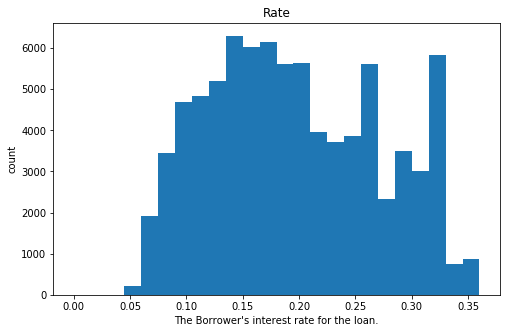

In [22]:
# start with a standard-scaled plot
binsize = .015
bins = np.arange(0, loans['rate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'rate', bins=bins)
plt.xlabel("The Borrower's interest rate for the loan.")
plt.ylabel("count")
plt.title("Rate")
plt.show()

As we can see from the distribution of the rate variable it seems that most of the loans has interest rate between 6 and 20 percent.

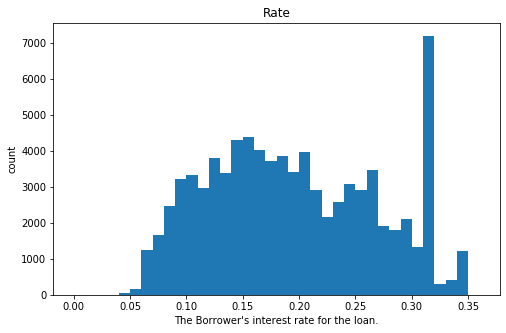

In [23]:
# start with a standard-scaled plot
binsize = .01
bins = np.arange(0, loans['rate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'rate', bins=bins)
plt.xlabel("The Borrower's interest rate for the loan.")
plt.ylabel("count")
plt.title("Rate")
plt.show()

As we can see there is lots of loans with rate .32 except that most of rates are among 6 and 26.

What we get from the above graphs is that most of the loans have a rate close to .17 with some loans with higher rates even with tons of loans with .32 rate which indicates that the rate of the loan is not that static and we need to explore the variables affecting it in some way.

>**Now the return (benefit) From the loan.**

In [24]:
guide.loc['return']['Description']

'The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.'

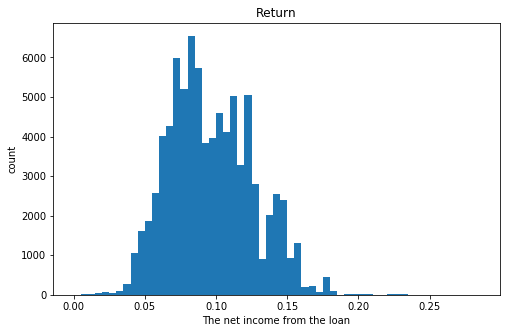

In [25]:
# start with a standard-scaled plot
binsize = .005
bins = np.arange(0, loans['return'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'return', bins=bins)
plt.xlabel("The net income from the loan")
plt.ylabel("count")
plt.title("Return")
plt.show()

As we can see from the histogram most of the loans have a return rate between .06 and .13 with some loans with .2 and above return rate.

**Lets have a look at this winning loans.**

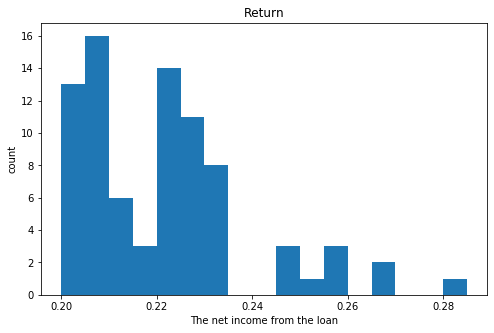

In [26]:
# start with a standard-scaled plot
binsize = .005
bins = np.arange(.2, loans['return'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'return', bins=bins)
plt.xlabel("The net income from the loan")
plt.ylabel("count")
plt.title("Return")
plt.show()

There is no much of them but as we see we have some winning loans.

So as we can see from the above graphs is that the benefit or return from a loan is somehow dynamic and is affected by some variables as we will see.
we have return of .01 ., 02, and silly rates and we have a return of .28 as a loaner we want to investigate this some deeper to get our hands on what to do to get a greater return.

### Now lets explore the other(Predecting) numeric variables.

**Now time for the (duration, loan_amount, payment, and investors) to be considered.**

In [27]:
# First lets know what each one means
to_explore = ('duration', 'loan_amount', 'payment', 'investors')
for i in to_explore:
    print(guide.loc[i]['Description'])

The length of the loan expressed in months.
The origination amount of the loan.
The scheduled monthly loan payment.
The number of investors that funded the loan.


In [28]:
# let's plot all four together to get an idea of each numeric variable.
def plot(binsize, criteria):
    plt.figure()
    bins = np.arange(0, loans[criteria].max()+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = loans, x = criteria, bins=bins)
    plt.xlabel(guide.loc[criteria]['Description'])
    plt.ylabel("count")
    plt.title(criteria)
    

First with the duration variable

<Figure size 432x288 with 0 Axes>

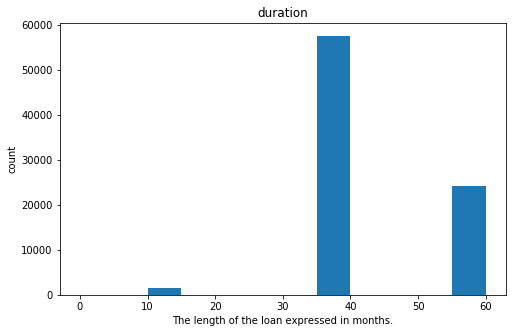

In [29]:
plot(5, 'duration')

In [30]:
loans.duration.nunique()

3

In [31]:
loans.duration.unique()

array([36, 60, 12], dtype=int64)

As we can see the duration is an ardered categorial type by its nature with most loans haveing a duration of 36 months(Three years) and some loans of 5 years and a small fraction of loans with one year period.

In [32]:
# lets convert the duration into its proper type
mapper = {12: "one year", 36: "three years", 60: "five years"}
loans.duration = loans.duration.apply(lambda i: mapper[i])

ordered_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['one year', 'three years', 'five years'])
loans['duration'] = loans['duration'].astype(ordered_cat)

Now the loan_amount variable

<Figure size 432x288 with 0 Axes>

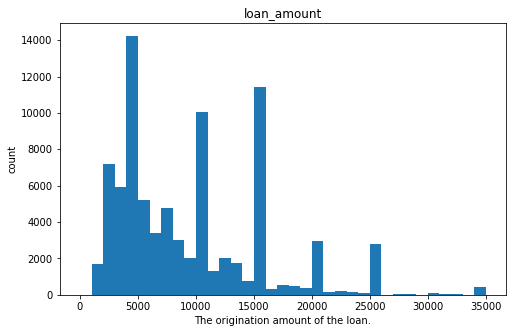

In [33]:
plot(1000, 'loan_amount')

As we can see from the figure most loans have an original amount of loan from 3000 to 8000 with some greater loans of 20000 and above and as we can see from the chart 5, 10, 15, 20, 25, 30, 35 K are the tallest bars which makes perfecr sense and the most common loan is of 5K then 15K, and 10K which is pretty interesting.


Now lets have a look on the payment variable

<Figure size 432x288 with 0 Axes>

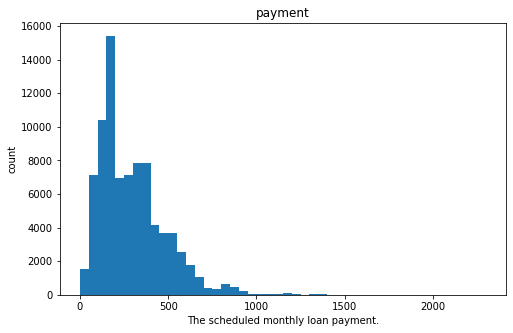

In [34]:
plot(50, 'payment')

Lets cut off the tail of the histogram to set the focus on the loans with payment from 0 to 1000 

(0, 1000)

<Figure size 432x288 with 0 Axes>

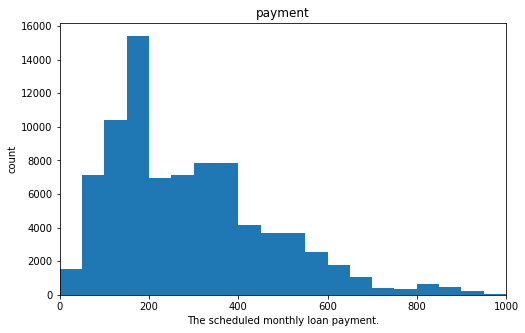

In [35]:
plot(50, 'payment')
plt.xlim(0, 1000)

As we can see from the figure most loans have monthly payment below 500 with some loans with higher payments and I strongly expect that to have something to do with the original loan amount but we will see about that later on.

now lets see the investors variable

<Figure size 432x288 with 0 Axes>

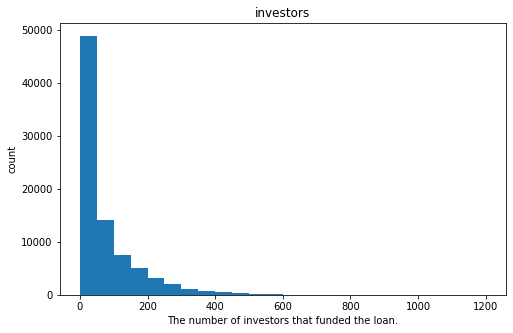

In [36]:
plot(50, 'investors')

so much noise

(0, 10)

<Figure size 432x288 with 0 Axes>

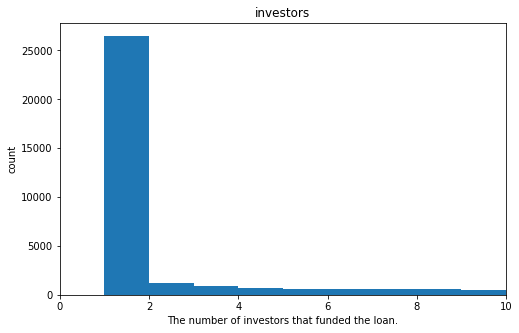

In [37]:
plot(1, 'investors')
plt.xlim(0, 10)

(10, 100)

<Figure size 432x288 with 0 Axes>

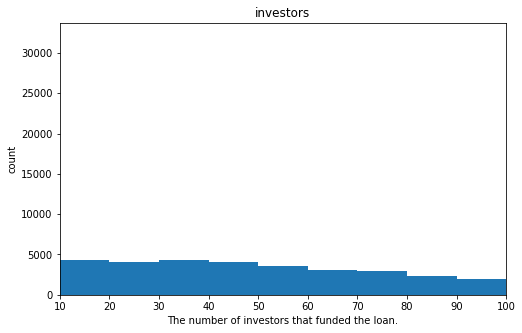

In [38]:
plot(10, 'investors')
plt.xlim(10, 100)

(100, 1000)

<Figure size 432x288 with 0 Axes>

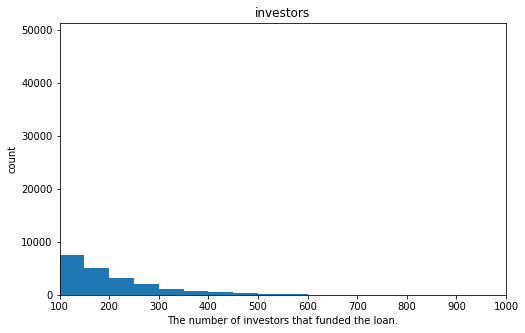

In [39]:
plot(50, 'investors')
plt.xlim(100, 1000)

It is clear that most of the loans have only 1 investor and the others almost have from 2-100 investors and there are so much fewer loans with greater number of investors. 

But lets look at the log transform for this variable

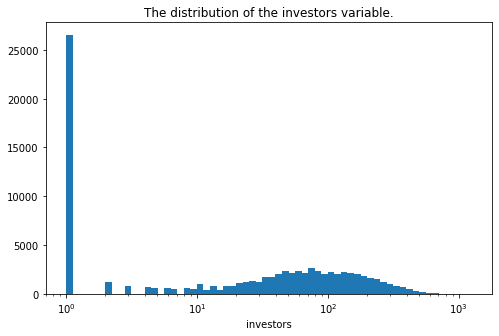

In [40]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(loans['investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'investors', bins = bins)
plt.xscale('log')
plt.xlabel('investors')
plt.title("The distribution of the investors variable.")
plt.show()

We have pretty much a normal distribution now.

## Now time to explore the categorial variables.

**Status, Prosper, Occupation, Employment, and home_owner variables.**
>Qualitative non ordinal variables we have only one ordinal category (duration)

In [41]:
# First lets know what each one means
to_explore = ('prosper', 'employment', 'home_owner', 'occupation', 'status')
for i in to_explore:
    print(guide.loc[i]['Description'] + "\n")

The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

The employment status of the borrower at the time they posted the listing.

A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

The Occupation selected by the Borrower at the time they created the listing.

The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.



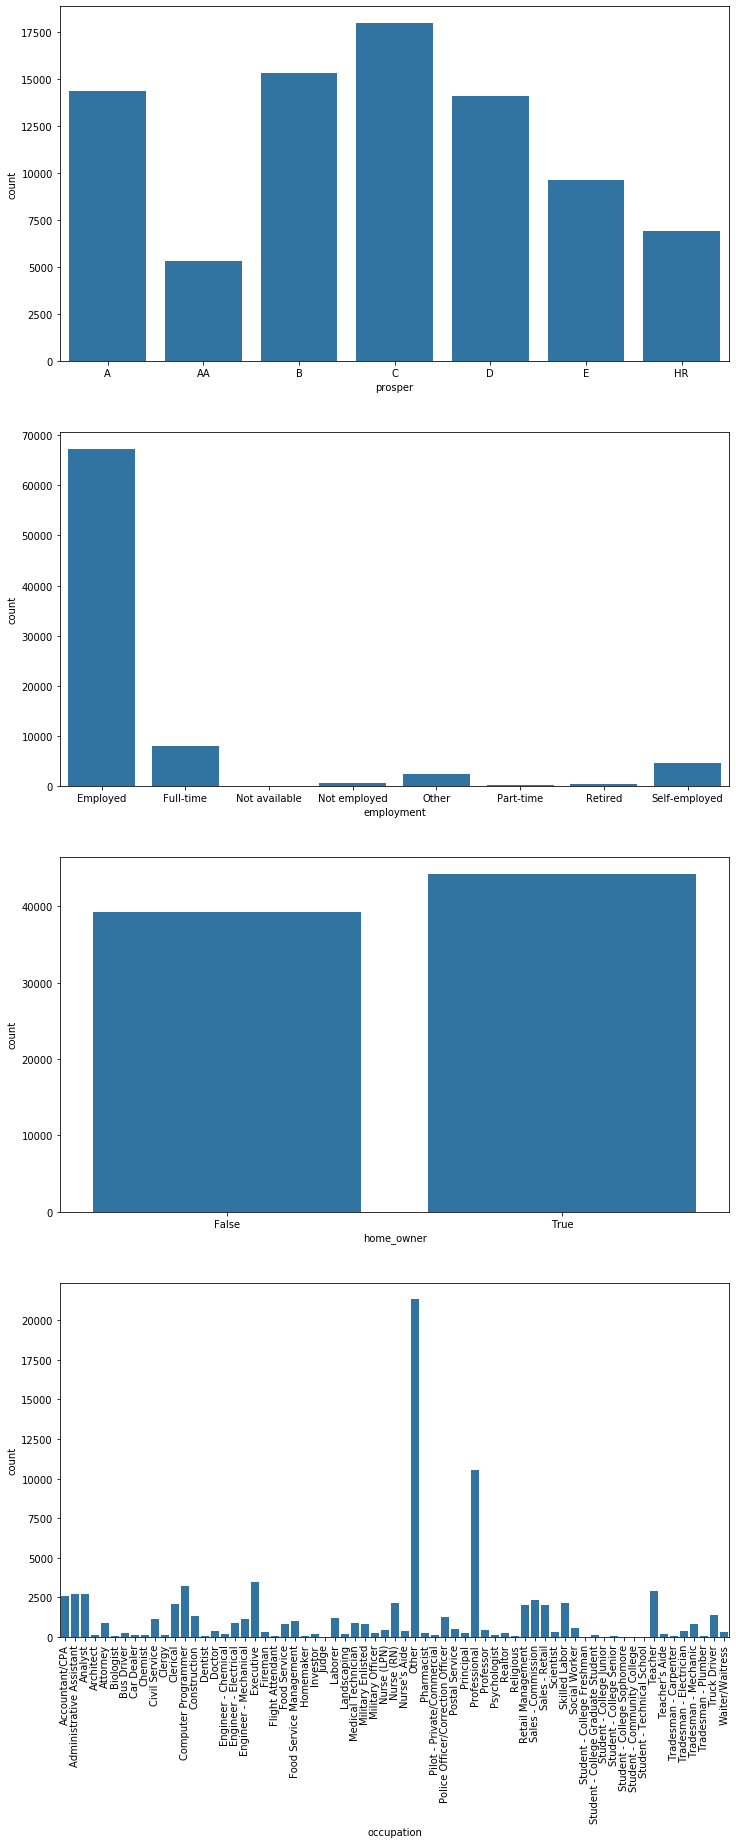

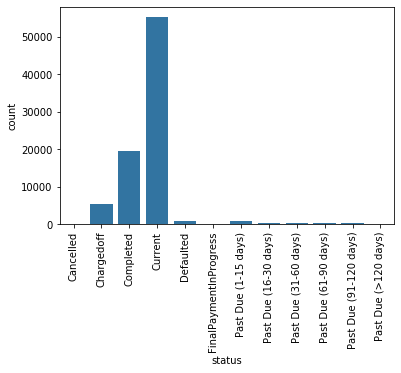

In [42]:
# let's plot all five together to get an idea of each categorical variable's distribution.
default_color = sb.color_palette()[0]
fig, ax = plt.subplots(nrows=4, figsize = [12,30])
for i in range(4):
    sb.countplot(data = loans, x = to_explore[i], color = default_color, ax = ax[i])
plt.xticks(rotation=90) 

plt.figure()
sb.countplot(data = loans, x = 'status', color = default_color)
plt.xticks(rotation=90)

plt.show();

**Now lets explore them..**

>As we can see The prosper variable is almost normally distributed with peak at C category and smallest count at AA category
but as we see the A Prospercount didn't follow the normal distribution and our data set has sp much loans with A prosper.<br>
The employment variable in the other hand is almost baised toward the employed category but there is small loans for not employed bborrower which make no sense and as we can see the part time, retired bars are pretty short.<br>
As we all expect the borrower is more likely to be a home owner as this plays the role of guaranteed pay back for the bank.<br>
As we see most of the loans are current loans but there are some loans that are either completed, charged of.

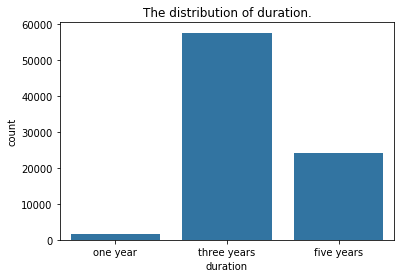

In [43]:
plt.title("The distribution of duration.")
sb.countplot(data=loans, x='duration', color=default_color)

As we can see and we have seen before most loans is a 3-year long loan and some are 5-year and a number of a single-year loan.

**NOW WE HAVE SEEN ALL THE FEATURES IN OUR DATA SET AND PLOT IT WITH THE PROPER PLOT TYPE NOW LETS DO A UNIVARIATE EXPLORATION...**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Our variable(s) of interest () are normally distributed which makes perfect sense so I did not need to perform any transformation they for sure have some outliers but nothing to worry about.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> nothing crazy about the variables except for the investors variable which has a pretty long tail so I had to looke at the data using a log transform of it except that all the distributions for the variables make perfect sense.

# -------------------------------------------------------------------------------------------------------

## Bivariate Exploration


Lets first categorize our variables

In [44]:
numerics = ['loan_amount', 'payment', 'investors', 'rate', 'return']
cats = ['prosper', 'home_owner', 'employment','duration', 'status', 'occupation']

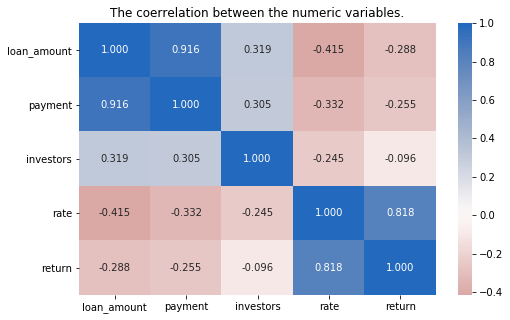

In [45]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numerics].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("The coerrelation between the numeric variables.")
plt.show()

Now we have a nice idea about how each two variables are related to each other
>As we see (loan amount, payment), (rate, return) each of these pairs are strongly positively related, and (loan amount, investors), (payment, investors) are weakly positively related and the other pairs are weakly negatively related. 

which actually makes sense as the monthly payment must be propotional to the original loan, and the yearly rate the borrower pay must be propotional to the gain or profit the bank will make from the loan.


**Now lets take it some level deeper**


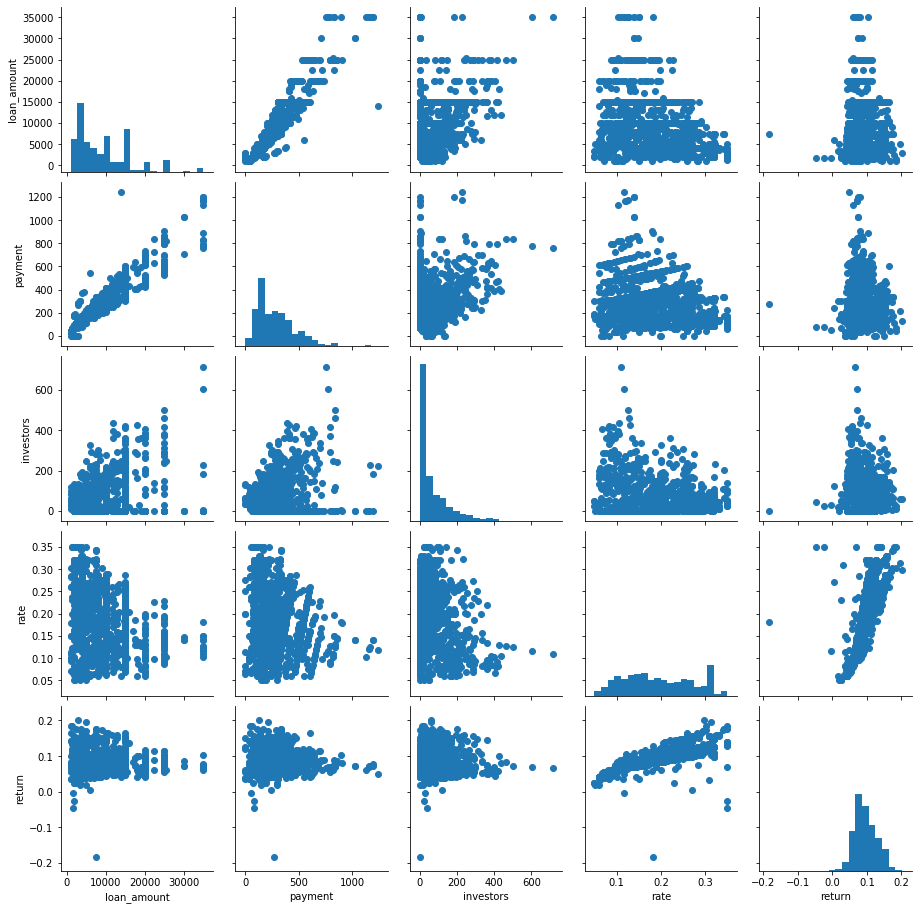

In [46]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster
loans_samp = loans.sample(1000)

g = sb.PairGrid(data = loans_samp, vars = numerics)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)


As expected, the (loan amount, payment), (rate, return)  dimensions are all highly correlated with one another.<br>
**Which ensure what we have seen above.**

surprisingly the loan amount is not coerrelated with the rate as I have expected higher loans to have lower interest rate, and also I have expected higher loans to get higher return which does not seem to be right, all the other relations make perfect sense for me.

Let's move on to looking at how rate and return variables correlate with the categorical variables.



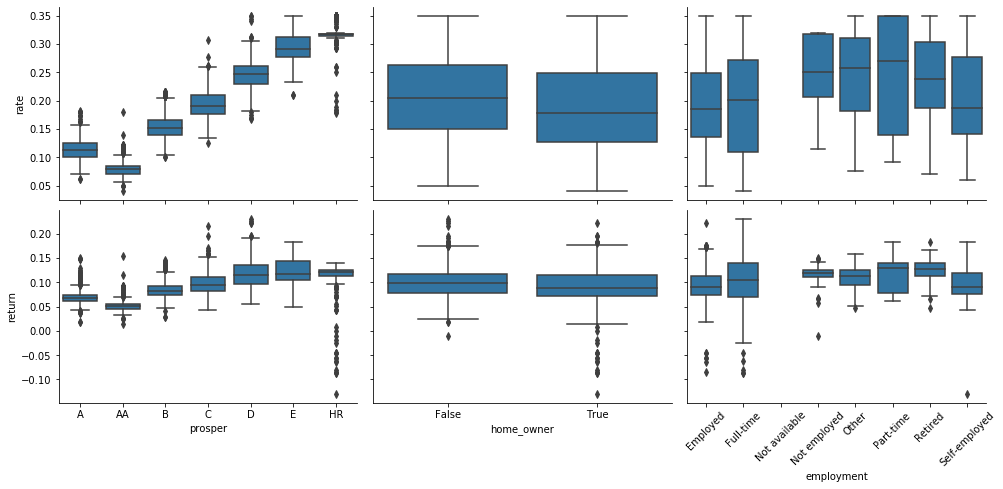

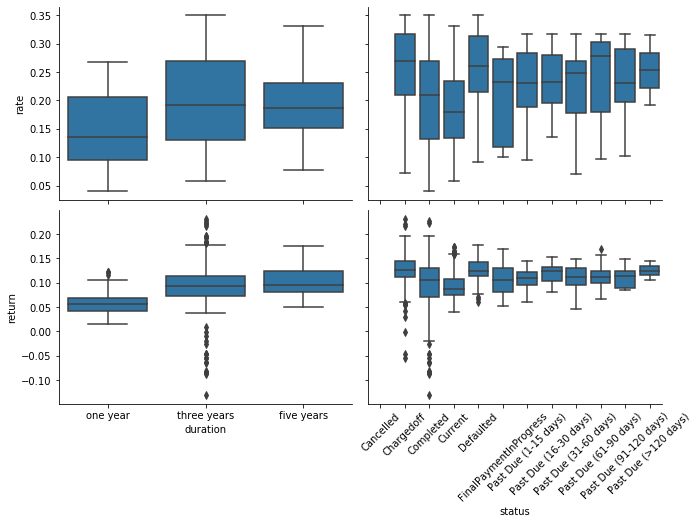

In [47]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

loans_samp = loans.sample(5000)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)


g = sb.PairGrid(data = loans_samp, y_vars = ['rate', 'return'], x_vars = cats[:3], aspect=1.5, height=3)
plt.xticks(rotation=45)
g.map(boxgrid)

g = sb.PairGrid(data = loans_samp, y_vars = ['rate', 'return'], x_vars = cats[3:5], aspect=1.5, height=3)
plt.xticks(rotation=45)
g.map(boxgrid)
plt.show();

**Lets interpret the resulted graphs one by one to see what is going on.**<br>
>**Firstly** It isabvious from the first box plot that the prosper is coerrelated with the rate as we move from lower prosper category to a heigher one A --> B --> C -->  D --> E --> HR the interest rate seems to increase which is not surprising, The same correlation is noted also between the prosper and the return variable.<br>
**Secondly** It is obvious and makes sense that the borrower who is NOT a home owner pays more interest rate than the home owner as being homeless raises the risk of not paying back so the bank must make it up, the coerrelation between the home owner and the return is not that strong as they are not related.<br>
**Thirdly** The not employed borrower pays more interest rate and that gives the bank more return but the other employment categories is not strongly related with the rate or the return variables.<br>
**Finally** As we can obviously see the longer term loans seems to get heigher benefit or return to the bank but it is not clearly coerrelated to th interest rate.

Now, let's look at relationships between the categorical features.

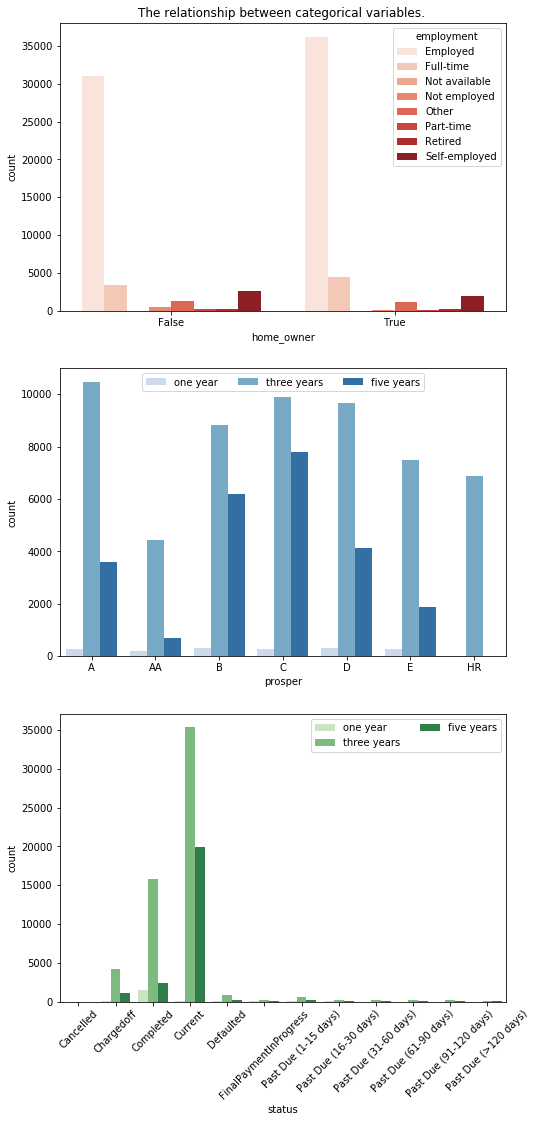

In [48]:
# We will explore the categorical variables with our whole data set
plt.figure(figsize = [8, 18])

# subplot 1: home_owner vs employment 
plt.subplot(3, 1, 1)
plt.title("The relationship between categorical variables. ")
sb.countplot(data = loans, x = 'home_owner', hue = 'employment', palette = 'Reds')

# subplot 2: prosper vs. duration use different color palette
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans, x = 'prosper', hue = 'duration', palette = 'Blues')
ax.legend(ncol = 3) # re-arrange legend to reduce overlapping

# subplot 3: status vs. duration, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans, x = 'status', hue = 'duration', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=45)

plt.show()

**Now what does this mean??!! That is why I am here:**
> Firstly it seems that most home owners are employed which make sense.<br>
Secondly mostly the duration has nothing to do with the prosper except that all the HR prospers have a three-year loans.<br>Finally It seems that the duration is not coerrelated to the status.

**There are 3 numeric variables that cought my mind (rate, return, and loan_amount) lets explore each pair in more details.**<br>
Lets start with the variables of interest (interest rate and loan's return|income)

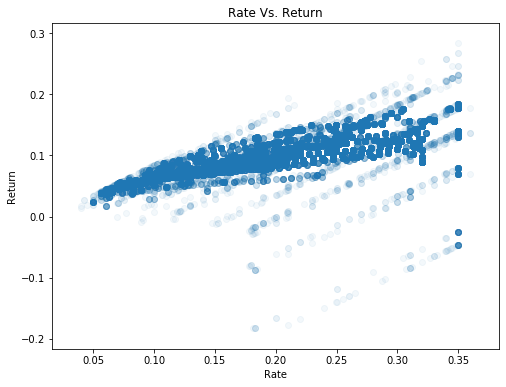

In [49]:
# scatter plot of rate vs. return.

plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'rate', y = 'return', alpha = 1/20)
plt.xlabel('Rate')
plt.ylabel('Return')
plt.title("Rate Vs. Return")
plt.show()

It seems like the coerrelation between rate and return is strong as the loans with heigher interest rates benefit the bank the most perfect but lets cut out the outliers.

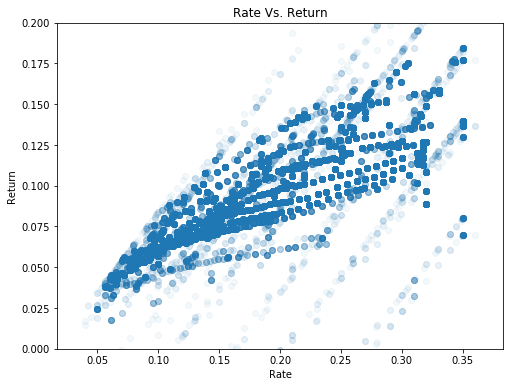

In [50]:
# scatter plot of rate vs. return.

plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'rate', y = 'return', alpha = 1/20)
plt.ylim([0, .2])
plt.xlabel('Rate')
plt.ylabel('Return')
plt.title("Rate Vs. Return")
plt.show()

It is obvious that the coerrelation is a pretty strong one.<br>
lets have a look at the relationship between rate and loan amount.

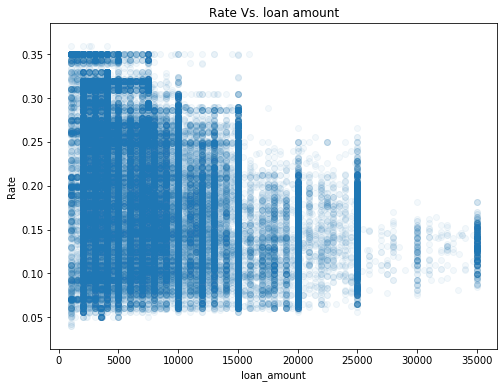

In [51]:
# scatter plot of rate vs. loan_amount.

plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'loan_amount', y = 'rate', alpha = 1/20)
plt.xlabel('loan_amount')
plt.ylabel('Rate')
plt.title("Rate Vs. loan amount")
plt.show()

The coerrelation is not strong but as we can see the higher loans have lower interest rate.<br>
Now lets move on to the relationship between Return and loan amount.

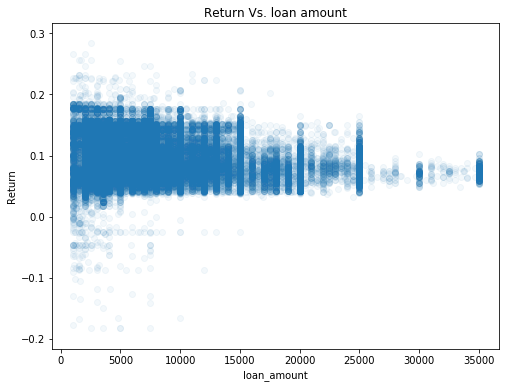

In [52]:
# scatter plot of return vs. loan_amount.

plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'loan_amount', y = 'return', alpha = 1/20)
plt.xlabel('loan_amount')
plt.ylabel('Return')
plt.title("Return Vs. loan amount")
plt.show()

Now lets cut out the outliers.

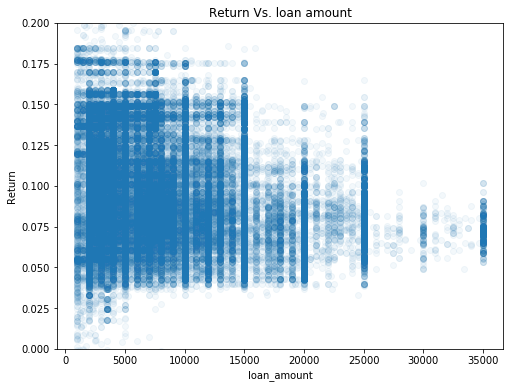

In [53]:
# scatter plot of return vs. loan_amount.

plt.figure(figsize = [8, 6])
plt.scatter(data = loans, x = 'loan_amount', y = 'return', alpha = 1/20)
plt.ylim([0, .2])
plt.xlabel('loan_amount')
plt.ylabel('Return')
plt.title("Return Vs. loan amount")
plt.show()

Now the coerrelation is much more obvious and as we can see lower loans seem to get more benefits for the bank but the coerrelation is not strong.

Now, let's take a second look at the rate and return distributions on the three categorical variables: duration, prosper, and home owner.

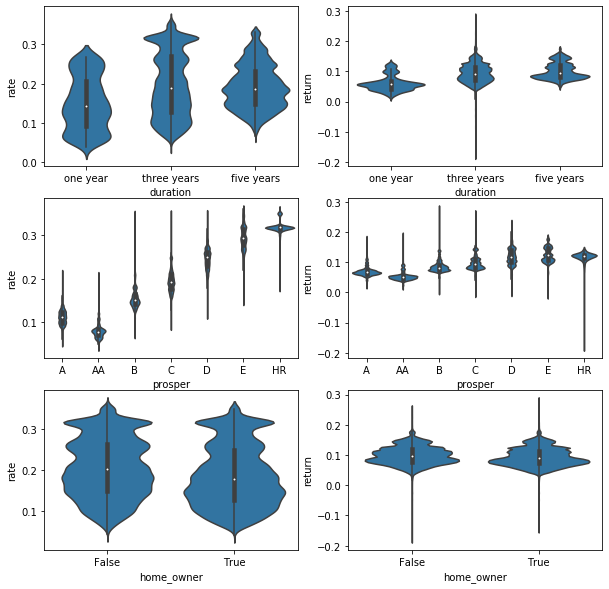

In [54]:
# plot the categorical variables against rate and return.
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i, j in (('duration', 0), ('prosper', 1), ('home_owner', 2)):
    sb.violinplot(data = loans, x = i, y = 'rate', ax = ax[j,0],
                  color = default_color)
    sb.violinplot(data = loans, x = i, y = 'return', ax = ax[j,1],
               color = default_color)

plt.show()

Nothing new it just ensures what we have seen from the box plots.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>As we have seen the return  is strongly coerrelated to the interest rate which makes prfect sense as the higher the borrower pay as an interest the more income the bank will get.<br>
And the payment is strongly related to the loan amount as the higher the loan is the higher monthly payment the borrower will pay.<br>
And the home owner is related to the employment variable as an employed person is more likely to have his own house.<br>
The rate is related to the employment and the home owner variables as being unemployed or homeless raise the risk of not paying back so the bank must get some value to make up this risk by getting higher interest rate from the borrower.<br>
Nothing crazy I think all the observed coerrelation make perfect sense.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Sure I have, First mostly the duration has nothing to do with the prosper except that all the HR prospers have a three-year loans which was surprising for me.<br>
And It seems that the duration is not coerrelated to the status which I did not expect coming as I thought short-term loans will be more likely completed while long-term loans may be cancelled.

# -------------------------------------------------------------------------------------------------------

## Multivariate Exploration

> In this section we are interested in the relationships between 3 or more variables, by logic at least one of them will be one of the variables of interest(rate and return).

Lets start by the relationship between rate, return, and duration.

In [55]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin=.2)


C:\Users\al-ghaly\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


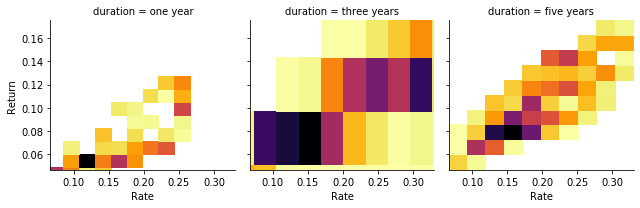

In [56]:
# create faceted heat maps on levels of the prosper variable
g = sb.FacetGrid(data = loans, col = 'duration', col_wrap = 3, size = 3,
            )
g.map(hist2dgrid, 'rate', 'return', color = 'inferno_r')
g.set_xlabels('Rate')
g.set_ylabels('Return')

plt.show()

After seeing the relationship in the heatmap lets look at it in a scatter plot.

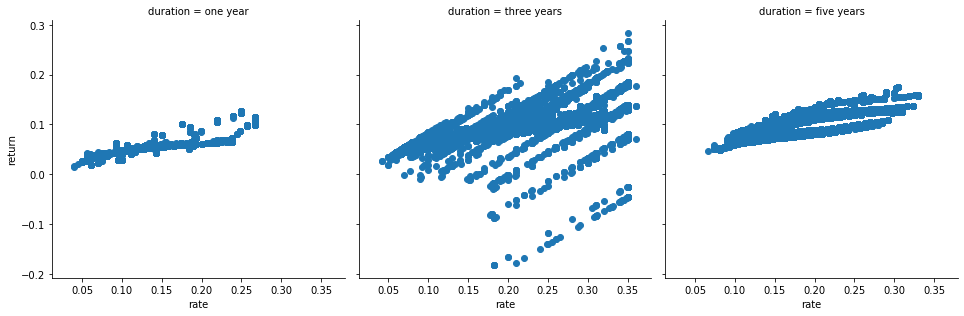

In [57]:
g = sb.FacetGrid(data = loans, col = 'duration', size = 4.5,
                margin_titles = True)
g.map(plt.scatter, 'rate', 'return')

It looks like the coerrelation between rate and return is its strongest in 3 years loans.

Now lets look at the relation between status, rate, and return

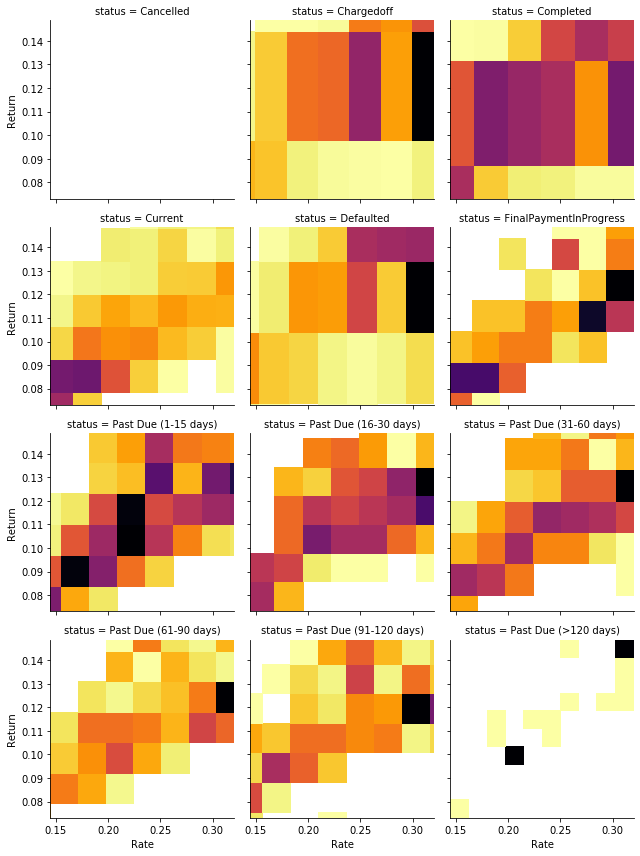

In [58]:
# create faceted heat maps on levels of the prosper variable
g = sb.FacetGrid(data = loans, col = 'status', col_wrap = 3, size = 3,
            )
g.map(hist2dgrid, 'rate', 'return', color = 'inferno_r')
g.set_xlabels('Rate')
g.set_ylabels('Return')

plt.show()

After seeing the relationship in the heatmap lets look at it in a scatter plot.

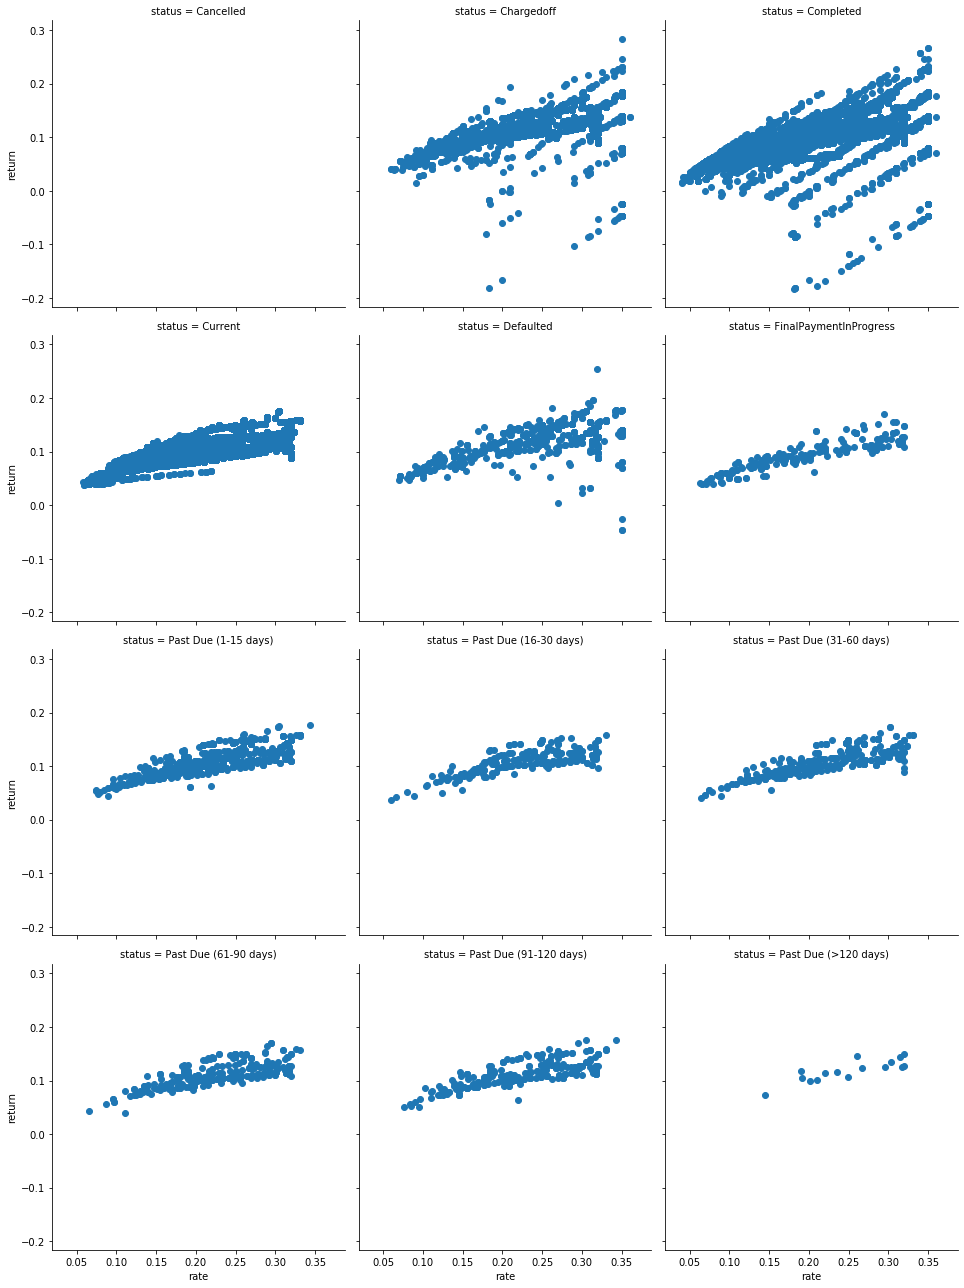

In [59]:
g = sb.FacetGrid(data = loans, col = 'status', size = 4.5,
                margin_titles = True, col_wrap=3)
g.map(plt.scatter, 'rate', 'return')

Now lets combine the four variables together to see what is going on.

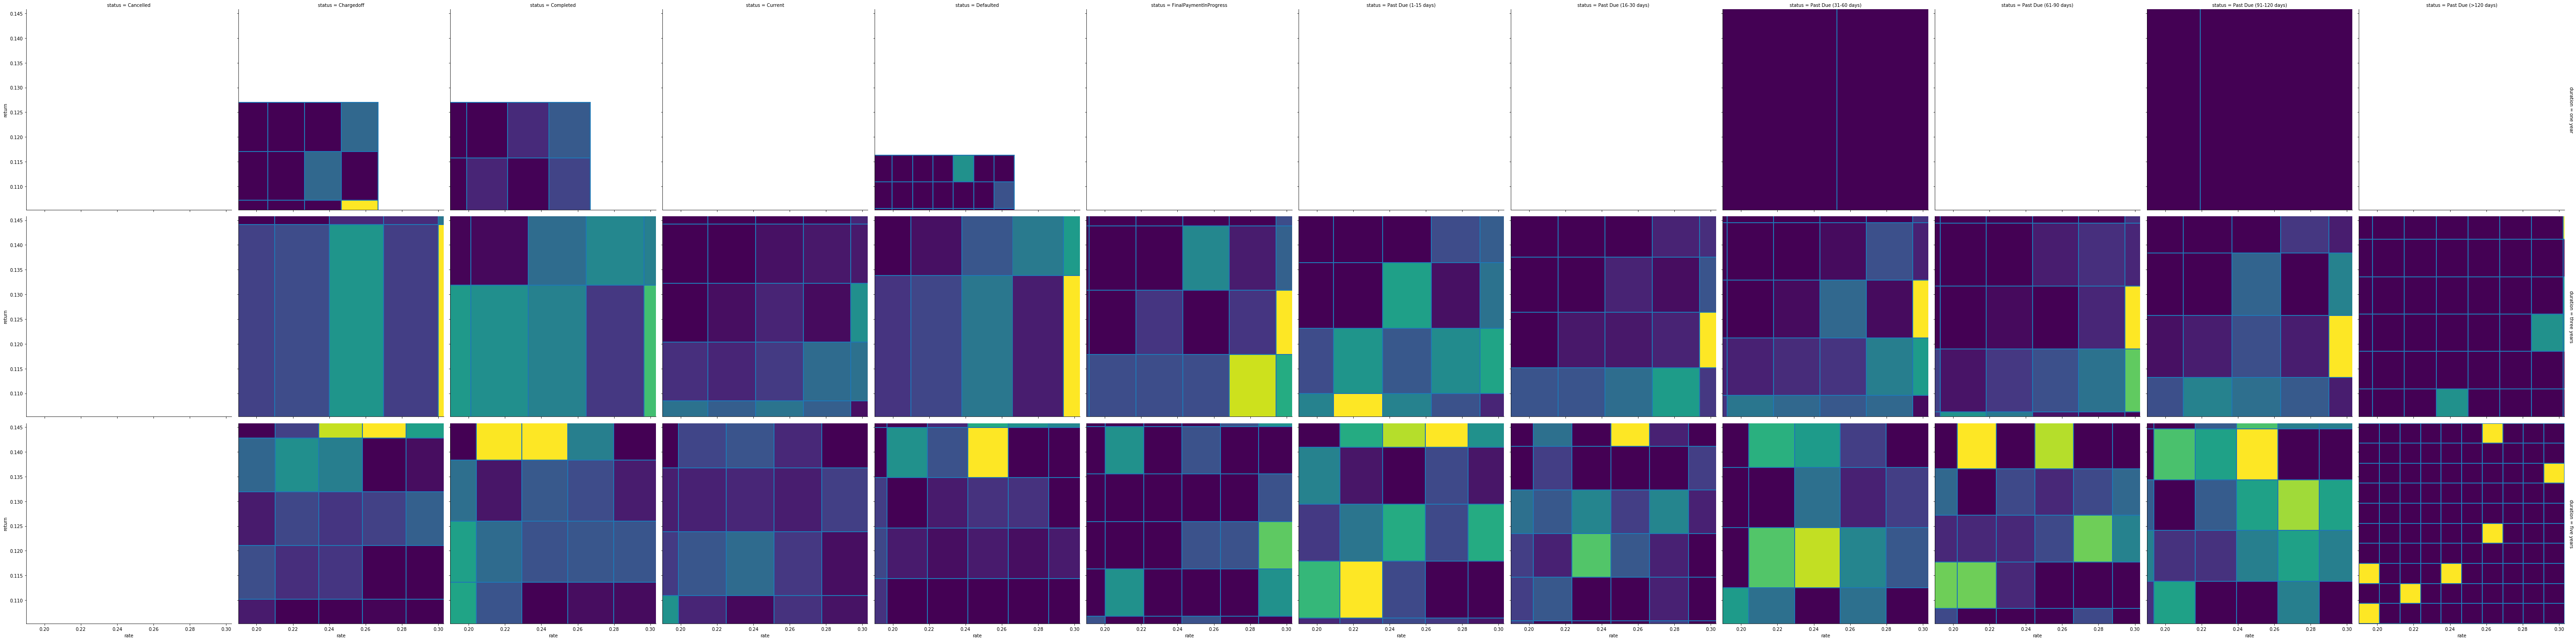

In [60]:
# create faceted heat maps on levels of duration and status
g = sb.FacetGrid(data = loans, col = 'status', row = 'duration', size = 6.5,
                  margin_titles = True)
g.map(plt.hist2d, 'rate', 'return',)


plt.show()

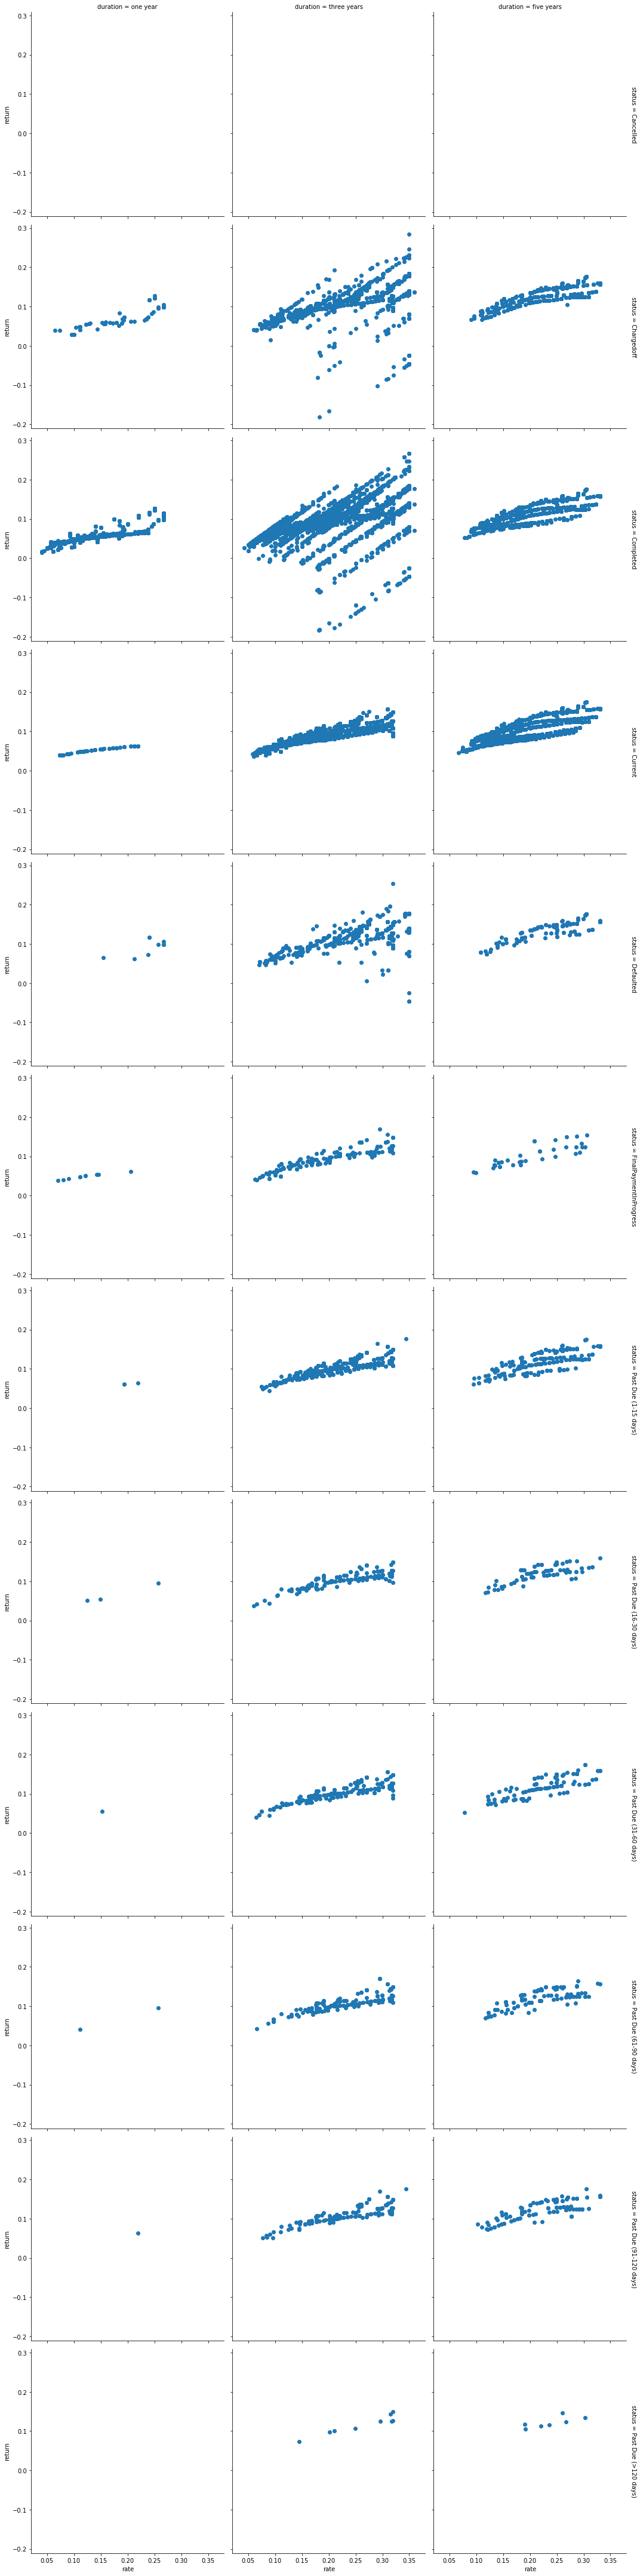

In [61]:
g = sb.FacetGrid(data = loans, col = 'duration', row='status', size=5,
                margin_titles = True)
g.map(plt.scatter, 'rate', 'return')

Now lets explore the relationship among three numeric variables rate, return, and loan amount

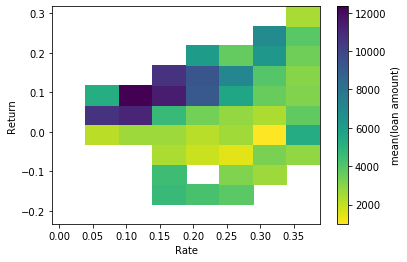

In [62]:
xbin_edges = np.arange(loans['rate'].min()-0.05, loans['rate'].max()+0.05, 0.05)
ybin_edges = np.arange(loans['return'].min()-0.05, loans['return'].max()+0.05, 0.05)

# count number of points in each bin
xbin_idxs = pd.cut(loans['rate'], xbin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)
ybin_idxs = pd.cut(loans['return'], ybin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

pts_per_bin = loans.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'rate', columns = 'return').values
z_wts = loans['loan_amount'] / pts_per_bin[xbin_idxs - 1, ybin_idxs - 1]

# plot the data using the calculated weights
plt.hist2d(data = loans, x = 'rate', y = 'return', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('Rate')
plt.ylabel('Return');
plt.colorbar(label = 'mean(loan amount)');


Now lets see it one more time but encoded scatter plot.

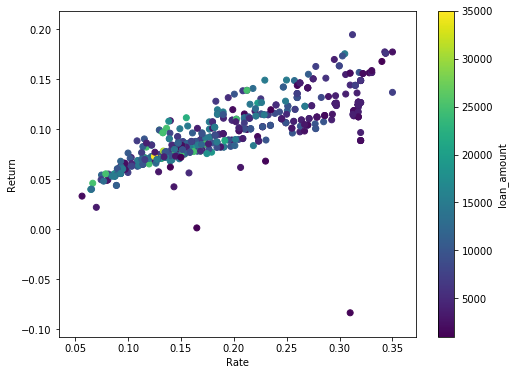

In [63]:
plt.figure(figsize = [8,6])
plt.scatter(data = loans.sample(500), x = 'rate', y = 'return',
                c = 'loan_amount',)
plt.colorbar(label = 'loan_amount')
# plt.xlim(0,160)
# plt.ylim(15,160)
plt.xlabel('Rate')
plt.ylabel('Return');




As we see the higher loans have mostly low rates and average return. 

Now lets look at two numeric variables return and loan amount with a qualitative variable duration. 

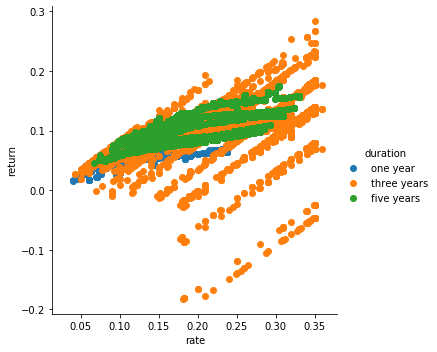

In [64]:
# plotting
g = sb.FacetGrid(data =loans, hue = 'duration', size = 5)
g.map(plt.scatter, 'rate','return')
g.add_legend()


As we see long term loans have higher return.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at the multivariate exploration of the data set, the duration of the loan strongly indicate the coerrelation between variables of interest rate and return as higher term loans have stronger coerrelation, also the status variable is related to the variables of interest, and as we saw in the 3 numerics investigation of loan amount, rate, and return we have found that higher loans are associated with lower rates and average return for the loaner.

### Were there any interesting or surprising interactions between features?

> Nope nothing crazy all make perfect sense due to the logic.<br>

# -------------------------------------------------------------------------------------------------------